In [ ]:
import numpy as np
import datasets
from transformers import PreTrainedTokenizerFast



def count_mean_token_length(dataset: datasets.Dataset, tokenizer, text_field='text', num_samples=1000):
    # Load the dataset

    if num_samples != -1:
        dataset = dataset.take(num_samples)
    dataset = dataset.map(lambda x : count_tokens(tokenizer, x))
    mean_token_length = np.mean(dataset[text_field])
    
    return mean_token_length


In [32]:
import sys
sys.path.append('../')
from token_data import load_tokenizer
tokenizer = load_tokenizer()

dataset_name = "HuggingFaceH4/ultrachat_200k"
dataset = datasets.load_dataset(dataset_name, split="train_sft")
num_samples = 1000
if num_samples != -1:
    dataset = dataset.take(num_samples)
dataset = dataset.map(lambda x : count_tokens(tokenizer, x))
mean_token_length = np.mean(dataset["tokens"])

In [33]:
max_token_length = np.max(dataset["tokens"])
max_token_length

5364

In [34]:
np.histogram(dataset["tokens"], bins=[0, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768])

(array([  0,   0,   1,  54, 343, 497, 101,   4,   0,   0]),
 array([    0,    64,   128,   256,   512,  1024,  2048,  4096,  8192,
        16384, 32768]))

(array([168., 175., 197., 130., 107.,  63.,  51.,  17.,   5.,   6.,   9.,
          7.,   4.,   2.,   0.,   0.,   1.,   2.,   1.,   0.,   0.,   0.]),
 array([ 512.,  768., 1024., 1280., 1536., 1792., 2048., 2304., 2560.,
        2816., 3072., 3328., 3584., 3840., 4096., 4352., 4608., 4864.,
        5120., 5376., 5632., 5888., 6144.]),
 <BarContainer object of 22 artists>)

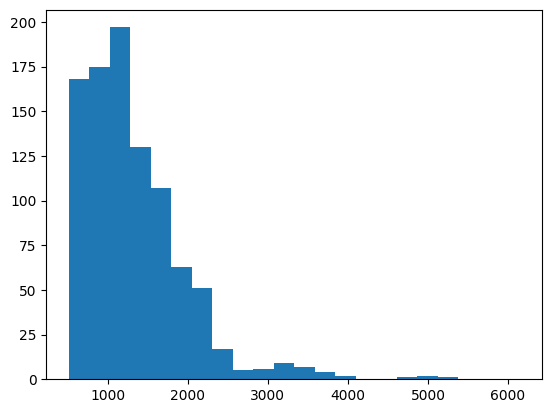

In [38]:
import matplotlib.pyplot as plt
plt.hist(dataset["tokens"], bins=[512, 768, 1024, 1280, 1536, 1792, 2048, 2304, 2560, 2816, 3072, 3328, 3584, 3840, 4096, 4352, 4608, 4864, 5120, 5376, 5632, 5888, 6144,])